#Part 3: Projected Gradient Descent

In [ ]:
#Implementing the PGD attack

#PGD Instance on trained classifier from Part 1
pgd = MadryEtAl(wrap, sess=sess)

#Attack parameters
pgd_params = {'eps':0.25,
              'eps_iter':0.01,
              'nb_iter':20,
              'clip_min':0.,
              'clip_max':1.}

#Generate adversarial data
pgd_adversarial_data_train = pgd.generate_np(data_train, **pgd_params)
pgd_adversarial_data_test = pgd.generate_np(data_test, **pgd_params)

#Evaluate accuracy of perturbed data on target classifier
perturbed_data_score = classifier.evaluate(pgd_adversarial_data_test, labels_test)
print(f'Testing accuracy on perturbed data is {perturbed_data_score[1]*100}%')

10000/10000 [==============================] - 1s 61us/step
Testing accuracy on perturbed data is 0.9600000455975533%


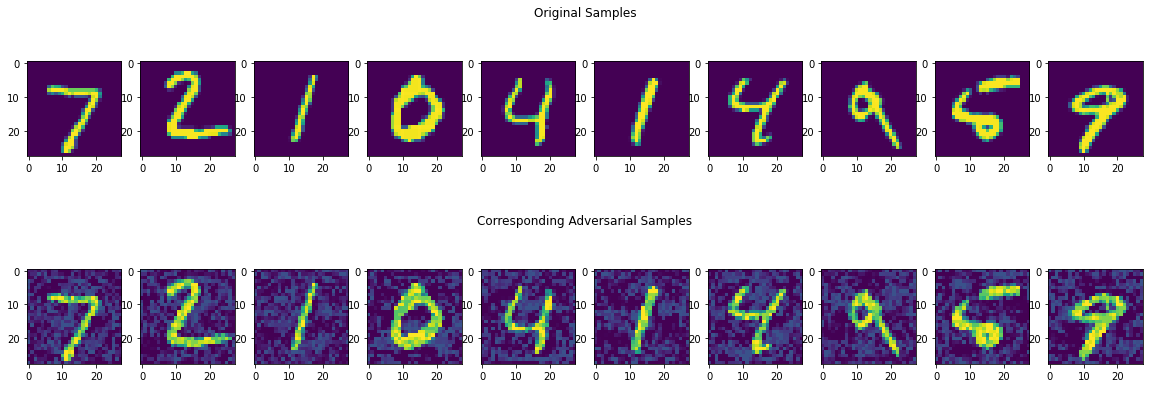

In [ ]:
#Show ten original samples and their corresponding adversarial samples
fig, axes = plt.subplots(2, 10, figsize=(20, 7))
grids = plt.GridSpec(2, 1)
titles = ['Original Samples', 'Corresponding Adversarial Samples']

for i in range(2):
  row = fig.add_subplot(grids[i])
  row.set_title(titles[i])
  row.set_axis_off()

for i in range(10):
  axes[0][i].imshow(data_test[i].reshape(28, 28))
  axes[1][i].imshow(pgd_adversarial_data_test[i].reshape(28, 28))

In [ ]:
#Implementing the adversarial training defense
pgd_trained_classifier = classifier
pgd_trained_classifier_metadata = pgd_trained_classifier.fit(pgd_adversarial_data_train, labels_train,
                                                             validation_data=(pgd_adversarial_data_test, labels_test),
                                                             epochs=50,
                                                             batch_size=256,
                                                             shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.7134 - accuracy: 0.9105 - val_loss: 0.1652 - val_accuracy: 0.9660
Epoch 2/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.0432 - accuracy: 0.9876 - val_loss: 0.1566 - val_accuracy: 0.9721
Epoch 3/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.0235 - accuracy: 0.9936 - val_loss: 0.1553 - val_accuracy: 0.9756
Epoch 4/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.0146 - accuracy: 0.9966 - val_loss: 0.1601 - val_accuracy: 0.9768
Epoch 5/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.0103 - accuracy: 0.9977 - val_loss: 0.1674 - val_accuracy: 0.9770
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.1730 - val_accuracy: 0.9777
Epoch 7/50
60000/60000 [==============================] - 1s 22us/st

In [ ]:
#Using the defense to evaluate the accuracy of the perturbed data
pgd_classifier_score = pgd_trained_classifier.evaluate(pgd_adversarial_data_test, labels_test)
print(f'Projected Gradient Descent trained classifier accuracy: {pgd_classifier_score[1]*100}%')

10000/10000 [==============================] - 1s 61us/step
Projected Gradient Descent trained classifier accuracy: 98.07000160217285%
